# Import packages and config path

In [1]:
from utils import raw_data_processing, Packages_file, lesion_tools
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import sklearn
from skimage.measure import label, regionprops
import re
import matplotlib.patches as patches
import PIL
import imageio
from utils.data_path import *

In [3]:
ROOT = '/wecare/home/khoi/thesis'
DATA_FOLDER = '/wecare/projects/Slicer_ready_data/Original Patient Data/Normalised_Recsaled_data'
CT_SCANS = os.path.join(DATA_FOLDER,'Images')
LABELS = os.path.join(DATA_FOLDER,'Labels_nii')
DEMO_FOLDER = os.path.join(ROOT, 'demo')
LABEL_MASKS = os.path.join(DEMO_FOLDER, 'masks_demo')
LABEL_TARGET = os.path.join(DEMO_FOLDER, 'targets_demo')
PROCESSED_SCANS = os.path.join(DEMO_FOLDER, 'scans_demo')

# Read one patient CT scan

In [2]:
pre_process = raw_data_processing.Data_processing()

In [4]:
patient_num = 2
upper_or_whole = True
foo = f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_0000.nii"
foo

'CTP02_001_0000.nii'

In [5]:
foo[:-4]

'CTP02_001_0000'

In [3]:
patient_num = 2
upper_or_whole = True

scan_path_foo = os.path.join(CT_SCANS, f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_0000.nii")
label_path_foo = os.path.join(MASKS, f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_1.nii")

patient_foo_list, patient_header_foo_list = pre_process.Loading_Nifti_data(CT_SCANS, [scan_path_foo])
label_foo_list, label_header_foo_list = pre_process.Loading_Nifti_data(MASKS, [label_path_foo])

----Start Loading Files---


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.53s/it]


---Nifti Data loaded Succesfully!---
----Start Loading Files---


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]

---Nifti Data loaded Succesfully!---


In [4]:
label_header_foo = label_header_foo_list[0]
patient_header_foo = patient_header_foo_list[0]

In [5]:
for key, value in patient_header_foo.items():
    print(f"{key}: {value}")

sizeof_hdr: 348
data_type: b''
db_name: b''
extents: 0
session_error: 0
regular: b''
dim_info: 0
dim: [  3 768 768 633   1   1   1   1]
intent_p1: 0.0
intent_p2: 0.0
intent_p3: 0.0
intent_code: 0
datatype: 4
bitpix: 16
slice_start: 0
pixdim: [-1.          0.59765625  0.59765625  2.5         1.          1.
  1.          1.        ]
vox_offset: 0.0
scl_slope: nan
scl_inter: nan
slice_end: 0
slice_code: 0
xyzt_units: 2
cal_max: 0.0
cal_min: 0.0
slice_duration: 0.0
toffset: 0.0
glmax: 0
glmin: 0
descrip: b''
aux_file: b''
qform_code: 0
sform_code: 2
quatern_b: 0.0
quatern_c: 1.0
quatern_d: 0.0
qoffset_x: 234.5489959716797
qoffset_y: -377.60235595703125
qoffset_z: 116.05999755859375
srow_x: [ -0.59765625   0.           0.         234.549     ]
srow_y: [  -0.            0.59765625    0.         -377.60236   ]
srow_z: [  0.    -0.     2.5  116.06]
intent_name: b''
magic: b'n+1'


In [6]:
for key, value in label_header_foo.items():
    print(f"{key}: {value}")

sizeof_hdr: 348
data_type: b''
db_name: b''
extents: 0
session_error: 0
regular: b'r'
dim_info: 0
dim: [  3 768 768 633   1   1   1   1]
intent_p1: 0.0
intent_p2: 0.0
intent_p3: 0.0
intent_code: 0
datatype: 4
bitpix: 16
slice_start: 0
pixdim: [-1.          0.59765625  0.59765625  2.5         0.          0.
  0.          0.        ]
vox_offset: 0.0
scl_slope: nan
scl_inter: nan
slice_end: 0
slice_code: 0
xyzt_units: 2
cal_max: 0.0
cal_min: 0.0
slice_duration: 0.0
toffset: 0.0
glmax: 0
glmin: 0
descrip: b''
aux_file: b''
qform_code: 1
sform_code: 0
quatern_b: -0.0
quatern_c: 1.0
quatern_d: 0.0
qoffset_x: 234.5489959716797
qoffset_y: -377.60235595703125
qoffset_z: 116.05999755859375
srow_x: [0. 0. 0. 0.]
srow_y: [0. 0. 0. 0.]
srow_z: [0. 0. 0. 0.]
intent_name: b''
magic: b'n+1'


In [14]:
label_header_foo["pixdim"]

array([-1.        ,  0.59765625,  0.59765625,  2.5       ,  0.        ,
        0.        ,  0.        ,  0.        ], dtype=float32)

In [21]:
patient_header_foo["descrip"]

array(b'', dtype='|S80')

In [23]:
patient_foo = patient_foo_list[0]
label_foo = label_foo_list[0]
patient_foo.shape, label_foo.shape

((768, 768, 633), (768, 768, 633))

In [39]:
props = lesion_tools.get_lesion_props(label_foo[:, :, 623], 0.0)

In [41]:
props[0].area

98

In [40]:
props[0].area * 0.59 * 0.59

34.1138

In [90]:
label_foo.dtype

dtype('float64')

# Find region properties of lesions

In [29]:
b = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
             ])
b_neighbors = label(b)
b_props = regionprops(b_neighbors)

In [31]:
b_neighbors

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
len(b_props)

2

In [30]:
b_props[0].bbox

(1, 1, 3, 3)

In [33]:
b_props[1].bbox

(6, 6, 8, 8)

In [36]:
for i in range(len(b_props)):
    print(b_props[i].bbox)
    print(b_props[i].centroid)

(1, 1, 3, 3)
(1.5, 1.5)
(6, 6, 8, 8)
(6.5, 6.5)


In [27]:
b_props[0].coords

array([[1, 1],
       [1, 2],
       [2, 1],
       [2, 2],
       [6, 6],
       [6, 7],
       [7, 6],
       [7, 7]])

In [28]:
b_props[0].image

array([[ True,  True, False, False, False, False, False],
       [ True,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False,  True,  True]])

In [22]:
len(b_props)

1

In [38]:
c = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
             ])
c_neighbors = label(c)
c_props = regionprops(c_neighbors)

In [39]:
len(c_props)

0

In [12]:
# Actually find properties of lesions
label_foo_int = label(label_foo > 0)
lesion_props_foo = regionprops(label_foo_int)

In [17]:
np.unique(label_foo_int)

array([0, 1], dtype=int32)

In [116]:
lesion_props_foo[0].area

499

In [13]:
lesion_props_foo[0].bbox

(397, 380, 623, 416, 400, 626)

In [14]:
lesion_props_foo[0].centroid

(405.08016032064126, 389.9799599198397, 624.0701402805611)

In [145]:
np.array(tuple(map(int, lesion_props_foo[0].centroid)))

array([405, 389, 624])

In [143]:
round(389.9799599198397,2)

389.98

In [119]:
lesion_props_foo[0].centroid_local

array([8.08016032, 9.97995992, 1.07014028])

In [128]:
lesion_props_foo[0].coords.shape

(499, 3)

In [132]:
lesion_props_foo[0].image.shape

(19, 20, 3)

In [133]:
np.unique(lesion_props_foo[0].image, return_counts=True)

(array([False,  True]), array([641, 499]))

In [134]:
lesion_props_foo[0].label

1

In [135]:
lesion_props_foo[0].slice

(slice(397, 416, None), slice(380, 400, None), slice(623, 626, None))

In [41]:
patient_foo[:, :, lesion_props_foo[0].slice[2]].shape

(768, 768, 3)

Need to normalize as follow: <br>
bbox-height / image-height <br>
bbox-width / image-width <br>
bbox-depth / image-depth <br>
Also do the same thing with centroid coordinates.

# Bounding boxes with Pytorch

In [18]:
import torch
from torchvision.ops import masks_to_boxes

In [20]:
b = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 1, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0],
             ])

In [22]:
b_tensor = torch.tensor(b)
b_tensor.shape

torch.Size([9, 9])

In [23]:
b_tensor > 0

tensor([[False, False, False, False, False, False, False, False, False],
        [False,  True,  True, False, False, False, False, False, False],
        [False,  True,  True, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False,  True,  True, False],
        [False, False, False, False, False, False,  True,  True, False],
        [False, False, False, False, False, False, False, False, False]])

# Visualize the CT scan and Labels

In [12]:
ctr = np.array(tuple(map(int, lesion_props_foo[0].centroid)))

In [150]:
ctr

array([405, 389, 624])

In [151]:
label_foo[:,:,ctr[2]].shape

(768, 768)

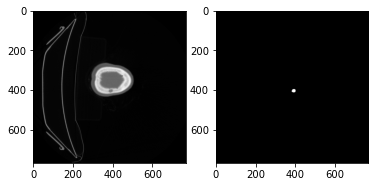

In [13]:
fig, axs = plt.subplots(1,2)
plt.gray()
axs[0].imshow(patient_foo[:,:,ctr[2]])
axs[1].imshow(label_foo[:,:,ctr[2]])
plt.show()

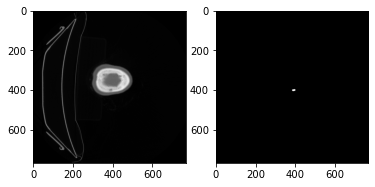

In [15]:
fig, axs = plt.subplots(1,2)
plt.gray()
axs[0].imshow(patient_foo[:,:,625])
axs[1].imshow(label_foo[:,:,625])
plt.show()

In [22]:
x_anchor, y_anchor = lesion_props_foo[0].bbox[1], lesion_props_foo[0].bbox[0]
bbox_height, bbox_width, _ = lesion_props_foo[0].image.shape

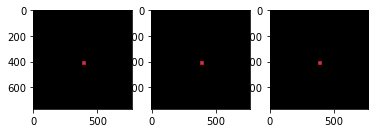

In [23]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(label_foo[:,:,623])
axs[1].imshow(label_foo[:,:,624])
axs[2].imshow(label_foo[:,:,625])

rect_0 = patches.Rectangle((x_anchor, y_anchor), bbox_width, bbox_height, edgecolor = 'r', linewidth = 1)
rect_1 = patches.Rectangle((x_anchor, y_anchor), bbox_width, bbox_height, edgecolor = 'r', linewidth = 1)
rect_2 = patches.Rectangle((x_anchor, y_anchor), bbox_width, bbox_height, edgecolor = 'r', linewidth = 1)

axs[0].add_patch(rect_0)
axs[1].add_patch(rect_1)
axs[2].add_patch(rect_2)

plt.show()

In [168]:
scan_cube = patient_foo[lesion_props_foo[0].slice]
mask_cube = label_foo[lesion_props_foo[0].slice]

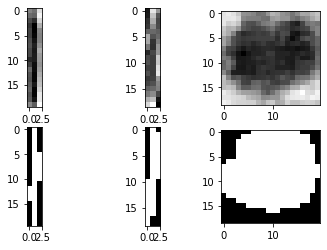

In [170]:
fig, axs = plt.subplots(2,3)
axs[0,0].imshow(scan_cube[int(scan_cube.shape[0]/2),:,:])
axs[1,0].imshow(mask_cube[int(mask_cube.shape[0]/2),:,:])
axs[0,1].imshow(scan_cube[:,int(scan_cube.shape[1]/2),:])
axs[1,1].imshow(mask_cube[:,int(mask_cube.shape[1]/2),:])
axs[0,2].imshow(scan_cube[:,:,int(scan_cube.shape[2]/2)])
axs[1,2].imshow(mask_cube[:,:,int(mask_cube.shape[2]/2)])
plt.show()

# Convert CT scan and labels into images

In [171]:
patient_foo.shape

(768, 768, 633)

In [172]:
z = 18
f"_{z:04}_"

'_0018_'

In [ ]:
range()

In [188]:
cmap = plt.gray()
num_slices = patient_foo.shape[2]
lesion_start = lesion_props_foo[0].bbox[2]
lesion_end = lesion_props_foo[0].bbox[5]
for k in range(num_slices): 
    plt.imsave(os.path.join(PROCESSED_SCANS, 
                            f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_0000_{k:04}_{1 if k in range(lesion_start, lesion_end) else 0}.png"), 
                            patient_foo[:,:,k], 
                            cmap = cmap)

<Figure size 432x288 with 0 Axes>

In [189]:
cmap = plt.gray()
num_slices = label_foo.shape[2]
lesion_start = lesion_props_foo[0].bbox[2]
lesion_end = lesion_props_foo[0].bbox[5]
for k in range(num_slices): 
    plt.imsave(os.path.join(LABEL_MASKS, 
                            f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_{k:04}_{1 if k in range(lesion_start, lesion_end) else 0}.png"), 
                            label_foo[:,:,k], 
                            cmap = cmap)

<Figure size 432x288 with 0 Axes>

# Create training target

In [211]:
n = 0
for file in os.listdir(LABEL_MASKS):
    #re.search(r'CTP[0-9]{2}_[0-9]{3}_[0-9]{4}_1.png', file)
    if re.search(r'.*_1.png', file):
        print(re.search(r'.*_1.png', file))

<re.Match object; span=(0, 20), match='CTP02_001_0623_1.png'>
<re.Match object; span=(0, 20), match='CTP02_001_0624_1.png'>
<re.Match object; span=(0, 20), match='CTP02_001_0625_1.png'>


In [11]:
a = re.search(r'[0-9]{4}_1.png', 'CTP02_001_0623_1.png')
a.group(0)

'0623_1.png'

In [13]:
int(a.group(0)[:4])

623

In [24]:
img_height, img_width, _ = label_foo.shape
bbox_height, bbox_width, _ = lesion_props_foo[0].image.shape
ctr = np.array(tuple(map(int, lesion_props_foo[0].centroid)))
bbox_height, bbox_width

(19, 20)

In [25]:
ctr

array([405, 389, 624])

In [29]:
bbox_height_norm = bbox_height / img_height
bbox_width_norm = bbox_width / img_width
ctr_x_norm = ctr[1] / img_width
ctr_y_norm = ctr[0] / img_height

In [30]:
ctr_x_norm, ctr_y_norm

(0.5065104166666666, 0.52734375)

In [31]:
for file in os.listdir(LABEL_MASKS):
    if re.search(r'.*_1.png', file):
        tmp = re.search(r'[0-9]{4}_1.png', file)
        k = int(tmp.group(0)[:4])
        with open(os.path.join(LABEL_TARGET, f"CTP{patient_num:02}_{'001' if upper_or_whole else '002'}_{k:04}_1.txt"), "w") as f:
            f.write(f"0 {ctr_x_norm} {ctr_y_norm} {bbox_width_norm} {bbox_height_norm}")
            

In [56]:
img = imageio.imread(os.path.join(DEMO_FOLDER, "masks_demo", "CTP02_001_0000_0.png"))
props_label = label(img)
props = regionprops(props_label)
len(props)

1

In [55]:
np.unique(img, return_counts=True)

(Array([  0, 255], dtype=uint8), array([1769472,  589824]))

# Others

In [50]:
from skimage.measure import label, regionprops
import torchvision.io
from torchvision.io import read_image
from skimage.io import imread
import torchvision.transforms as T
import numpy as np
import os

AUG_MASKS = os.path.join(ROOT, 'ct_processed_aug', 'masks')
AUG_IMGS = os.path.join(ROOT, 'ct_processed_aug', 'images')
ex_mask = read_image(os.path.join(AUG_MASKS, 'CTP02_001_0623.png'), mode = torchvision.io.ImageReadMode.GRAY)
ex_img = read_image(os.path.join(AUG_IMGS, 'CTP02_001_0000_0623.png'), mode = torchvision.io.ImageReadMode.GRAY)
ex_img.shape, ex_mask.shape

(torch.Size([1, 768, 768]), torch.Size([1, 768, 768]))

In [54]:
np.unique(ex_mask, return_counts=True)

(array([  0, 255], dtype=uint8), array([589726,     98]))

In [55]:
ex_label_mask= label(ex_mask.squeeze(), background = 0)
ex_region_img = regionprops(ex_label_img)

In [56]:
ex_region_mask[0].bbox

(406, 385, 416, 398)

In [40]:
torch.tensor(ex_img).shape

torch.Size([768, 768])

In [51]:
TF.rotate(ex_mask, angle = 30)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

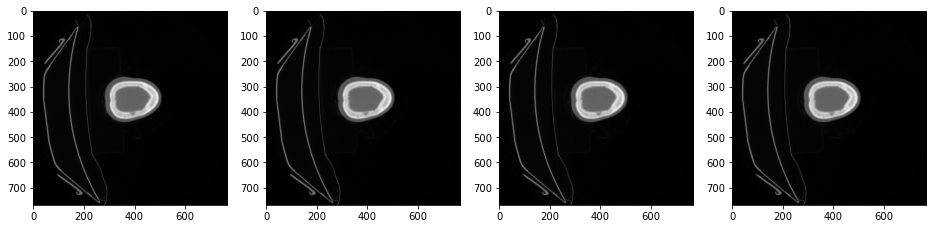

In [60]:
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as TF
import torch
import matplotlib

rand_deg = random.uniform(-30,30)
rotated_ex_imgs = [TF.rotate(ex_img,angle= rand_deg) for _ in range(4)]

fig, axs = plt.subplots(1,4, figsize = (16,12))
for i in range(4):
    axs[i].imshow(rotated_ex_imgs[i].squeeze(), cmap = 'gray')

In [63]:
AUG_TARGETS = os.path.join(ROOT, 'ct_processed_aug', 'labels')
os.system(f"cat {AUG_TARGETS}/* | wc -l")

2813


0